In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [85]:
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [86]:
data.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [88]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)


In [89]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

In [90]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                212 non-null    object 
 1   radius_mean              212 non-null    float64
 2   texture_mean             212 non-null    float64
 3   perimeter_mean           212 non-null    float64
 4   area_mean                212 non-null    float64
 5   smoothness_mean          212 non-null    float64
 6   compactness_mean         212 non-null    float64
 7   concavity_mean           212 non-null    float64
 8   concave points_mean      212 non-null    float64
 9   symmetry_mean            212 non-null    float64
 10  fractal_dimension_mean   212 non-null    float64
 11  radius_se                212 non-null    float64
 12  texture_se               212 non-null    float64
 13  perimeter_se             212 non-null    float64
 14  area_se                  2

In [91]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                357 non-null    object 
 1   radius_mean              357 non-null    float64
 2   texture_mean             357 non-null    float64
 3   perimeter_mean           357 non-null    float64
 4   area_mean                357 non-null    float64
 5   smoothness_mean          357 non-null    float64
 6   compactness_mean         357 non-null    float64
 7   concavity_mean           357 non-null    float64
 8   concave points_mean      357 non-null    float64
 9   symmetry_mean            357 non-null    float64
 10  fractal_dimension_mean   357 non-null    float64
 11  radius_se                357 non-null    float64
 12  texture_se               357 non-null    float64
 13  perimeter_se             357 non-null    float64
 14  area_se                  

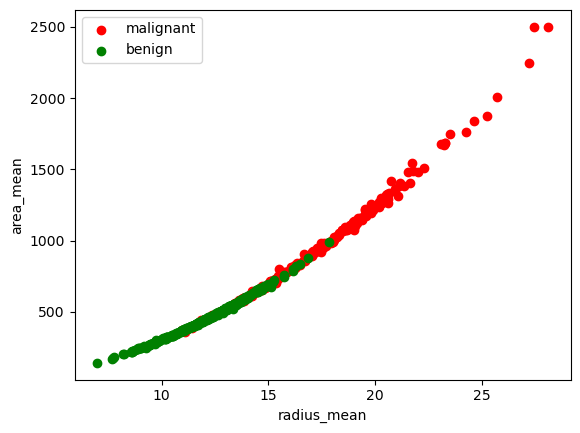

In [92]:
plt.scatter(M.radius_mean,M.area_mean,color="red",label="malignant")
plt.scatter(B.radius_mean,B.area_mean,color="green",label="benign")
plt.legend() 
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.show()

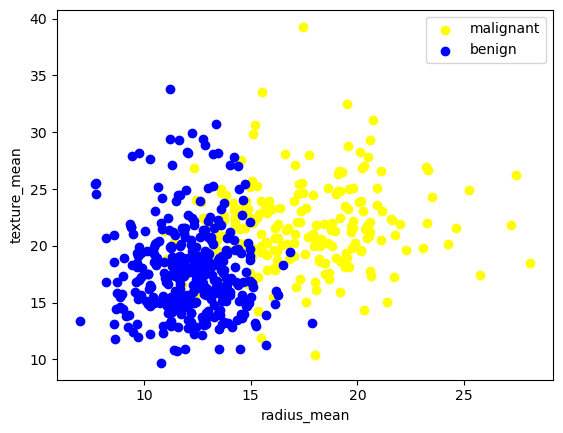

In [93]:
plt.scatter(M.radius_mean,M.texture_mean,color="yellow",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="blue",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [94]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 


In [95]:
y = data.diagnosis.values 

In [96]:
x_data= data.iloc[:,1:3].values 

In [97]:

x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [98]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [99]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [100]:

y_head = knn.predict(x_test)
y_head


array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [101]:
print("when k is {}, accuracy of knn classification {} ".format(3,knn.score(x_test,y_test)))

when k is 3, accuracy of knn classification 0.8421052631578947 


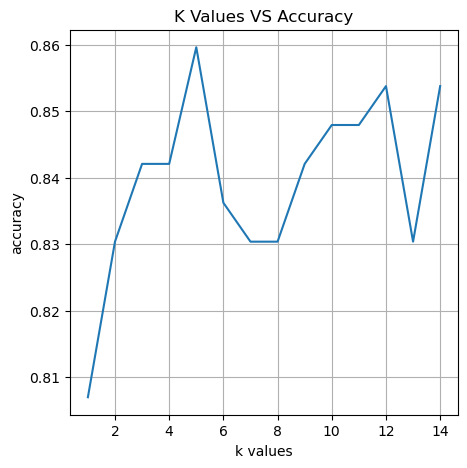

Best accuracy is 0.8596491228070176 with K = 5


In [102]:
# find k value
test_accuracy = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    test_accuracy.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.title('K Values VS Accuracy')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

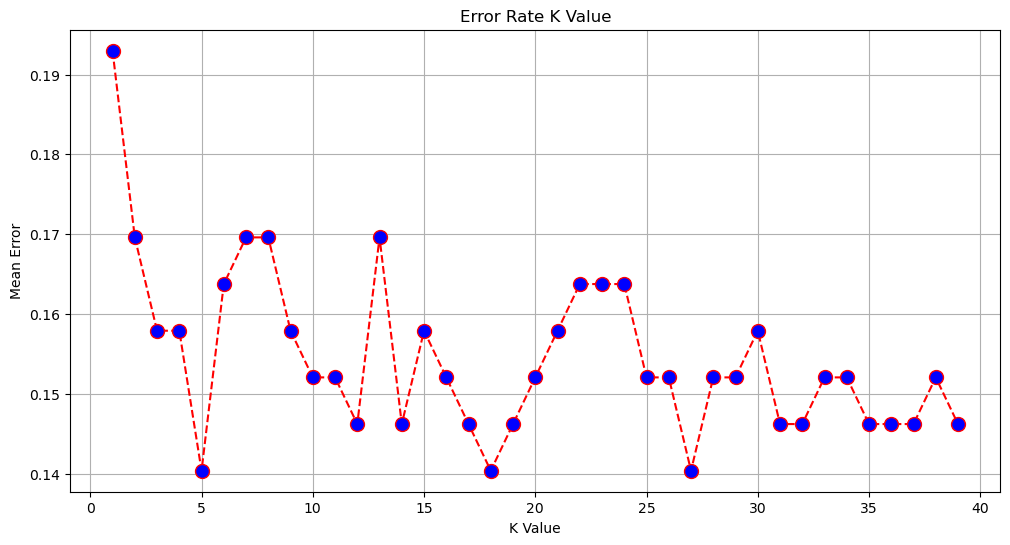

In [103]:
error = []
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

In [104]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

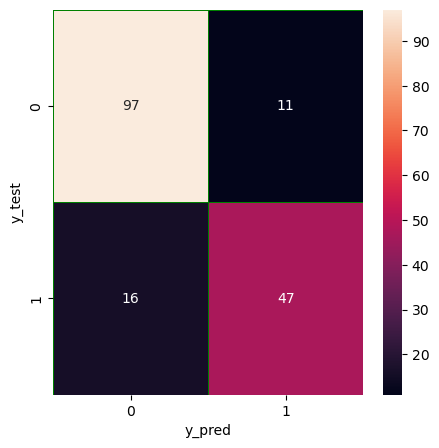

In [105]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="green",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

# 3D Printer Dataset for Mechanical Engineers:



In [106]:
printer = pd.read_csv("/kaggle/input/3dprinter/data.csv")

In [107]:
printer.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [108]:
print(printer.columns)

Index(['layer_height', 'wall_thickness', 'infill_density', 'infill_pattern',
       'nozzle_temperature', 'bed_temperature', 'print_speed', 'material',
       'fan_speed', 'roughness', 'tension_strenght', 'elongation'],
      dtype='object')


In [109]:
print(printer.describe())

       layer_height  wall_thickness  infill_density  nozzle_temperature  \
count     50.000000       50.000000        50.00000           50.000000   
mean       0.106000        5.220000        53.40000          221.500000   
std        0.064397        2.922747        25.36348           14.820353   
min        0.020000        1.000000        10.00000          200.000000   
25%        0.060000        3.000000        40.00000          210.000000   
50%        0.100000        5.000000        50.00000          220.000000   
75%        0.150000        7.000000        80.00000          230.000000   
max        0.200000       10.000000        90.00000          250.000000   

       bed_temperature  print_speed   fan_speed   roughness  tension_strenght  \
count        50.000000      50.0000   50.000000   50.000000         50.000000   
mean         70.000000      64.0000   50.000000  170.580000         20.080000   
std           7.142857      29.6923   35.714286   99.034129          8.925634   


In [110]:
printer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [111]:
g = printer[printer.infill_pattern=="grid"]
h = printer[printer.infill_pattern=="honeycomb"]

In [112]:

g.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 48
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        25 non-null     float64
 1   wall_thickness      25 non-null     int64  
 2   infill_density      25 non-null     int64  
 3   infill_pattern      25 non-null     object 
 4   nozzle_temperature  25 non-null     int64  
 5   bed_temperature     25 non-null     int64  
 6   print_speed         25 non-null     int64  
 7   material            25 non-null     object 
 8   fan_speed           25 non-null     int64  
 9   roughness           25 non-null     int64  
 10  tension_strenght    25 non-null     int64  
 11  elongation          25 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 2.5+ KB


In [113]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        25 non-null     float64
 1   wall_thickness      25 non-null     int64  
 2   infill_density      25 non-null     int64  
 3   infill_pattern      25 non-null     object 
 4   nozzle_temperature  25 non-null     int64  
 5   bed_temperature     25 non-null     int64  
 6   print_speed         25 non-null     int64  
 7   material            25 non-null     object 
 8   fan_speed           25 non-null     int64  
 9   roughness           25 non-null     int64  
 10  tension_strenght    25 non-null     int64  
 11  elongation          25 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 2.5+ KB


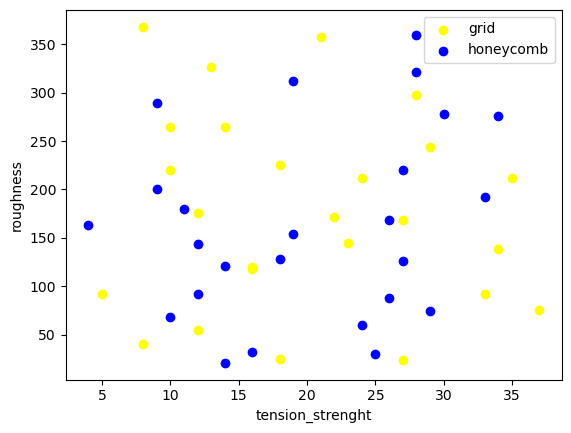

In [114]:
plt.scatter(g.tension_strenght,g.roughness,color="yellow",label="grid")
plt.scatter(h.tension_strenght,h.roughness,color="blue",label="honeycomb")
plt.legend() 
plt.xlabel("tension_strenght")
plt.ylabel("roughness")
plt.show()

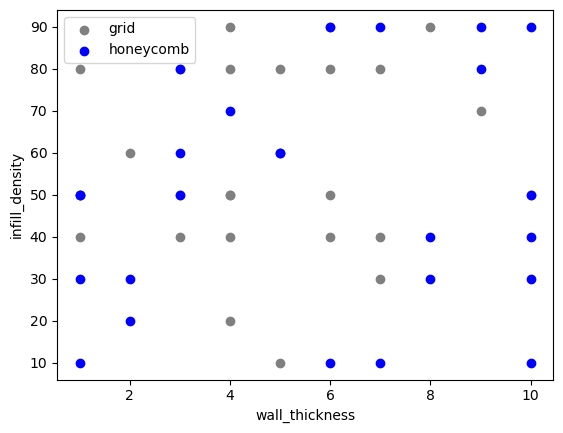

In [128]:
plt.scatter(g.wall_thickness,g.infill_density,color="gray",label="grid") 
plt.scatter(h.wall_thickness,h.infill_density,color="blue",label="honeycomb")
plt.xlabel("wall_thickness")
plt.ylabel("infill_density")
plt.legend()
plt.show()

In [116]:
printer.infill_pattern = [1 if each=="g" else 0 for each in printer.infill_pattern] 


In [117]:
y = printer.infill_pattern.values 

In [118]:
x_printer= printer.iloc[:,1:3].values 

In [119]:

x = (x_printer - np.min(x_printer))/(np.max(x_printer) - np.min(x_printer))

In [120]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [122]:
y_head = knn.predict(x_test)
y_head


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
print("when k is {}, accuracy of knn classification {} ".format(3,knn.score(x_test,y_test)))

when k is 3, accuracy of knn classification 1.0 


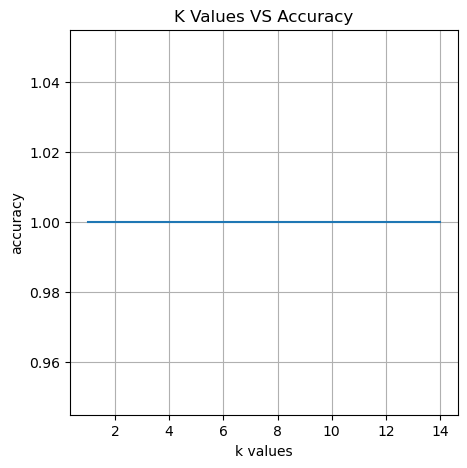

Best accuracy is 1.0 with K = 1


In [124]:
# find k value
test_accuracy = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    test_accuracy.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.title('K Values VS Accuracy')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

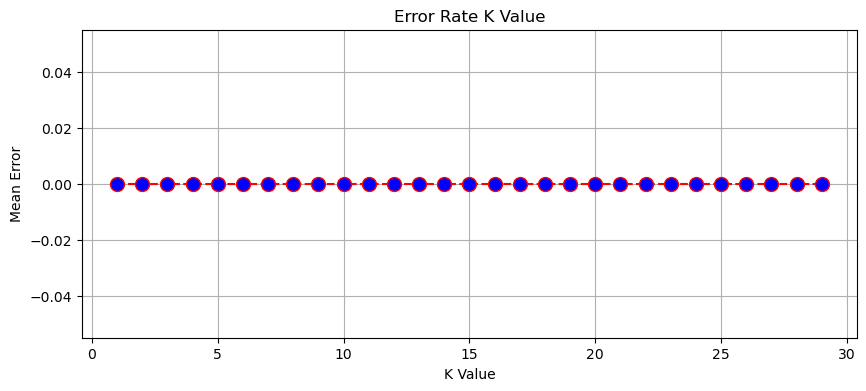

In [125]:
error = []
for i in range (1,30):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,4))
plt.plot(range(1,30), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

In [126]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_head)

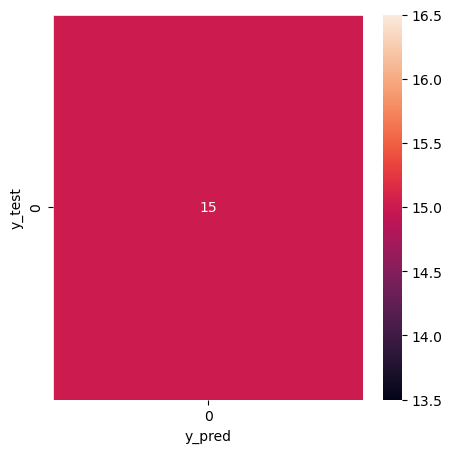

In [127]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm2,annot=True,fmt= '.0f',linewidths=0.5,linecolor="yellow",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()